In [1]:
import math
import torch
import gpytorch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import GPE_ensemble as GPE

from GPErks.gp.experiment import GPExperiment
from GPErks.train.emulator import GPEmulator
from GPErks.perks.inference import Inference
from GPErks.train.early_stop import NoEarlyStoppingCriterion
from GPErks.train.early_stop import (
    GLEarlyStoppingCriterion,
    PQEarlyStoppingCriterion,
    UPEarlyStoppingCriterion, 
)
from GPErks.train.early_stop import PkEarlyStoppingCriterion

import scipy

%matplotlib inline
%load_ext autoreload
%autoreload 2

from sklearn.model_selection import train_test_split

# set logger and enforce reproducibility
from GPErks.log.logger import get_logger
from GPErks.utils.random import set_seed
log = get_logger()
seed = 8
set_seed(seed)

In [1]:
x_labels=pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\EP_healthy\input\xlabels_EP.txt',delim_whitespace=True,header=None)
inputOrig = pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\EP_healthy\input\X_EP.txt',index_col=None,delim_whitespace=True,header=None)
inputOrig.columns=x_labels
print(inputOrig)

NameError: name 'pd' is not defined

In [3]:
y_labels=pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\EP_healthy\output\ylabels.txt',delim_whitespace=True,header=None)
outputOrig = pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\EP_healthy\output\Y.txt',index_col=None,delim_whitespace=True,header=None)
outputOrig.columns=y_labels
print(outputOrig)

     (A_TAT,)  (V_TAT,)
0     127.156  227.8230
1     251.071  188.8540
2     163.448  164.8120
3     110.207  110.6940
4     140.815  136.1450
..        ...       ...
175   321.082   94.4139
176   141.936  190.0140
177   236.662  224.8330
178   248.667  167.9450
179   118.693  115.3070

[180 rows x 2 columns]


In [4]:
# split original dataset in training, validation and testing sets
X=inputOrig
y=outputOrig
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=1,
    random_state=seed
)

In [5]:
emulator = GPE.ensemble(X_train.iloc[:,0:1],y_train,mean_func="linear",training_iter=500)

0
1


In [6]:
y_test

,"(A_TAT,)","(V_TAT,)"
26,232.374,161.202


In [7]:
X_test

,"(CV_ventricles,)","(k_ventricles,)","(k_FEC,)","(CV_atria,)","(k_atria,)","(k_BB,)"
26,0.556019,0.336764,2.42194,0.552269,0.215546,2.00919


In [8]:
np.random.multivariate_normal(mean=np.zeros(6), cov=np.identity(6), size=100)

array([[ 9.12047166e-02,  1.09128273e+00, -1.94697031e+00,
        -1.38634953e+00, -2.29649157e+00,  2.40983430e+00],
       [ 1.72783617e+00,  2.20455628e+00,  7.94827639e-01,
         9.76421096e-01, -1.18342715e+00,  1.91636361e+00],
       [-1.12332680e+00, -6.64035470e-01, -3.78358570e-01,
        -7.91615271e-01,  8.59548109e-01, -2.30788995e-01],
       [-6.56610281e-02, -2.08636235e-01,  1.34686857e+00,
        -6.06952797e-01, -1.74248214e-01,  4.24051421e-01],
       [-1.64599010e+00, -4.83540950e-01,  5.35468250e-01,
         1.16614049e+00,  1.61683109e-01, -6.72833927e-01],
       [ 1.44252413e+00, -2.21480611e-01,  3.12643137e-02,
         1.81929588e-01, -6.29287299e-02, -5.41568460e-01],
       [ 4.74518418e-01, -1.16459117e+00, -5.00909391e-01,
        -4.08560959e-01, -9.34348357e-01,  8.45101540e-02],
       [ 1.43691018e-01,  7.55494413e-02, -1.55645096e-01,
         5.50850056e-01,  1.70202996e+00,  1.00609370e+00],
       [-3.13491977e+00,  1.13953350e+00, -1.869

In [9]:
newdf = pd.DataFrame(np.repeat(X_test.values, 100, axis=0))#+np.random.multivariate_normal(mean=np.zeros(6), cov=0.01*np.identity(6), size=100)
newdf.columns = X_test.columns
print(newdf)

    (CV_ventricles,)  (k_ventricles,)  (k_FEC,)  (CV_atria,)  (k_atria,)  \
0           0.556019         0.336764   2.42194     0.552269    0.215546   
1           0.556019         0.336764   2.42194     0.552269    0.215546   
2           0.556019         0.336764   2.42194     0.552269    0.215546   
3           0.556019         0.336764   2.42194     0.552269    0.215546   
4           0.556019         0.336764   2.42194     0.552269    0.215546   
..               ...              ...       ...          ...         ...   
95          0.556019         0.336764   2.42194     0.552269    0.215546   
96          0.556019         0.336764   2.42194     0.552269    0.215546   
97          0.556019         0.336764   2.42194     0.552269    0.215546   
98          0.556019         0.336764   2.42194     0.552269    0.215546   
99          0.556019         0.336764   2.42194     0.552269    0.215546   

    (k_BB,)  
0   2.00919  
1   2.00919  
2   2.00919  
3   2.00919  
4   2.00919  
.. 

In [10]:
CV_V = np.linspace(0.4,0.8,100)

In [11]:
newdf.iloc[:,0] = CV_V

In [12]:
newdf

,"(CV_ventricles,)","(k_ventricles,)","(k_FEC,)","(CV_atria,)","(k_atria,)","(k_BB,)"
0,0.400000,0.336764,2.42194,0.552269,0.215546,2.00919
1,0.404040,0.336764,2.42194,0.552269,0.215546,2.00919
2,0.408081,0.336764,2.42194,0.552269,0.215546,2.00919
3,0.412121,0.336764,2.42194,0.552269,0.215546,2.00919
4,0.416162,0.336764,2.42194,0.552269,0.215546,2.00919
...,...,...,...,...,...,...
95,0.783838,0.336764,2.42194,0.552269,0.215546,2.00919
96,0.787879,0.336764,2.42194,0.552269,0.215546,2.00919
97,0.791919,0.336764,2.42194,0.552269,0.215546,2.00919
98,0.795960,0.336764,2.42194,0.552269,0.215546,2.00919


In [13]:
pred = emulator.predict(newdf.iloc[:,0:1])

In [14]:
pred[:,1]

tensor([194.7956, 193.6949, 192.5706, 191.4227, 190.2518, 189.0584, 187.8433,
        186.6075, 185.3521, 184.0784, 182.7877, 181.4815, 180.1614, 178.8288,
        177.4854, 176.1328, 174.7723, 173.4056, 172.0339, 170.6587, 169.2810,
        167.9021, 166.5230, 165.1446, 163.7677, 162.3931, 161.0217, 159.6539,
        158.2906, 156.9324, 155.5800, 154.2341, 152.8957, 151.5657, 150.2451,
        148.9352, 147.6372, 146.3527, 145.0832, 143.8306, 142.5968, 141.3836,
        140.1933, 139.0279, 137.8896, 136.7805, 135.7026, 134.6578, 133.6479,
        132.6744, 131.7385, 130.8412, 129.9831, 129.1644, 128.3849, 127.6438,
        126.9403, 126.2726, 125.6388, 125.0365, 124.4628, 123.9146, 123.3882,
        122.8800, 122.3858, 121.9015, 121.4227, 120.9451, 120.4644, 119.9763,
        119.4768, 118.9621, 118.4286, 117.8729, 117.2924, 116.6843, 116.0466,
        115.3777, 114.6763, 113.9416, 113.1731, 112.3710, 111.5355, 110.6674,
        109.7676, 108.8376, 107.8788, 106.8928, 105.8817, 104.84

(0.4, 0.9)

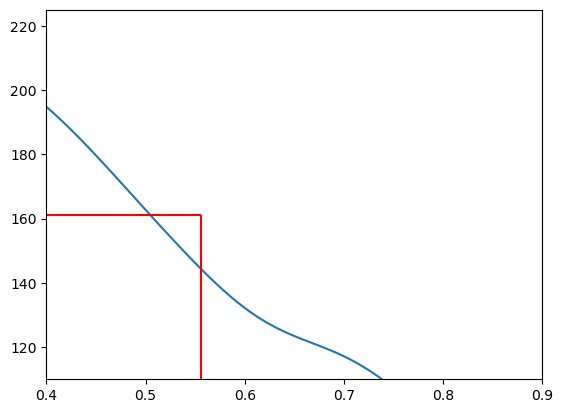

In [15]:
plt.plot(CV_V,pred[:,1].detach().numpy())
plt.hlines(161, 0.4, 0.556,'r')
plt.vlines(0.556, 110, 161,'r')
plt.ylim([110,225])
plt.xlim([0.4,0.9])

In [16]:
emulator.likelihoods[1]

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

In [17]:
emulator.models[1]

ExactLRGPModel(
  (likelihood): GaussianLikelihood(
    (noise_covar): HomoskedasticNoise(
      (raw_noise_constraint): GreaterThan(1.000E-04)
    )
  )
  (mean_module): LinearMean()
  (covar_module): ScaleKernel(
    (base_kernel): RBFKernel(
      (raw_lengthscale_constraint): Positive()
    )
    (raw_outputscale_constraint): Positive()
  )
)

In [18]:
emulator.likelihoods[1].marginal(emulator.models[1](torch.tensor(newdf.iloc[:,0:1].values).float()))

MultivariateNormal(loc: torch.Size([100]))

In [19]:
emulator.models[1](torch.tensor(newdf.iloc[:,0:1].values).float())

MultivariateNormal(loc: torch.Size([100]))

In [20]:
mll = gpytorch.mlls.ExactMarginalLogLikelihood(emulator.likelihoods[1], emulator.models[1])

In [21]:
y_rep = pd.DataFrame(np.repeat(y_test.values, 100, axis=0))
y_rep.columns = y_test.columns
print(y_rep)

    (A_TAT,)  (V_TAT,)
0    232.374   161.202
1    232.374   161.202
2    232.374   161.202
3    232.374   161.202
4    232.374   161.202
..       ...       ...
95   232.374   161.202
96   232.374   161.202
97   232.374   161.202
98   232.374   161.202
99   232.374   161.202

[100 rows x 2 columns]


In [22]:
mll(emulator.models[1]((torch.tensor(((newdf.iloc[:,0:1]-emulator.training_input_mean)/emulator.training_input_STD).values).float())),torch.tensor(((y_rep.iloc[:,1]-emulator.training_output_mean[1])/emulator.training_output_STD[1]).values).float()).detach().numpy()

array(-1.2651792, dtype=float32)

In [23]:
emulator.models[1](torch.tensor(newdf.iloc[:,0:1].values).float())

MultivariateNormal(loc: torch.Size([100]))

In [24]:
newdf.iloc[0:1,:].shape

(1, 6)

In [25]:
y_rep.iloc[1,1]

161.202

In [26]:
? emulator.models[1].covar_module

In [27]:
varvar = emulator.models[1].covar_module(torch.tensor([1]))

In [28]:
varvar.evaluate()

tensor([[0.0239]], grad_fn=<MulBackward0>)

In [29]:

for param_name, param in emulator.models[1].named_parameters():
    print(f'Parameter name: {param_name:42} value = {param.item()}')

Parameter name: likelihood.noise_covar.raw_noise           value = -0.8058335781097412
Parameter name: mean_module.weights                        value = -0.7942273020744324
Parameter name: mean_module.bias                           value = 0.020796196535229683
Parameter name: covar_module.raw_outputscale               value = -3.7226145267486572
Parameter name: covar_module.base_kernel.raw_lengthscale   value = -0.29812124371528625


In [29]:
likelihood_manual = np.zeros(100)
emulator.models[1].eval()
for i in range(100):
    y = (y_rep.iloc[i,1]-emulator.training_output_mean[1])/emulator.training_output_STD[1]
    m = emulator.models[1].mean_module(torch.tensor(((newdf.iloc[i:i+1,0:1]-emulator.training_input_mean)/emulator.training_input_STD).values).float()).detach().numpy()
    k = emulator.models[1].covar_module(torch.tensor(((newdf.iloc[i:i+1,0:1]-emulator.training_input_mean)/emulator.training_input_STD).values).float()).evaluate().detach().numpy()
    likelihood_manual[i]=np.exp(-0.5* (y-m)**2/(k)) * 1/np.sqrt(2*np.pi *k)
    print(k)
    #np.exp(-0.5* (y-m)**2/(k+n^2+s^2)) * 1/sqrt(2pi *k(x,x)+n^2+s^2)
    #likelihood_manual[i]=np.exp(mll(emulator.models[1]((torch.tensor(((newdf.iloc[i:i+1,0:1]-emulator.training_input_mean)/emulator.training_input_STD).values).float())),torch.tensor(((y_rep.iloc[i,1]-emulator.training_output_mean[1])/emulator.training_output_STD[1])).float()).detach().numpy())

[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.02379162]]
[[0.023791

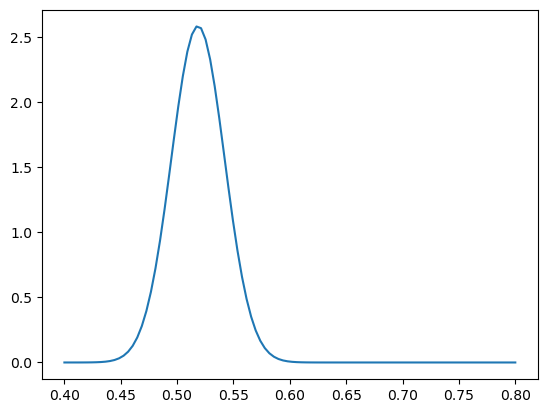

In [30]:
plt.plot(CV_V,likelihood_manual)

In [31]:
likelihood = np.zeros(100)
for i in range(100):
    likelihood[i]=np.exp(mll(emulator.models[1]((torch.tensor(((newdf.iloc[i:i+1,0:1]-emulator.training_input_mean)/emulator.training_input_STD).values).float())),torch.tensor(((y_rep.iloc[i,1]-emulator.training_output_mean[1])/emulator.training_output_STD[1])).float()).detach().numpy())

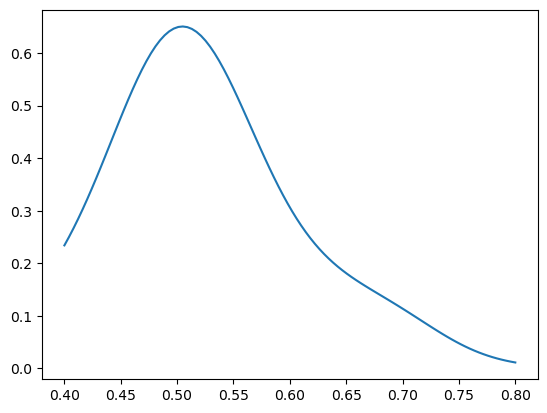

In [32]:
plt.plot(CV_V,likelihood)

In [77]:
X_test.iloc[:,0:1]

,"(CV_ventricles,)"
26,0.556019


In [122]:
emulator.training_input_mean

(CV_ventricles,)    0.590164
dtype: float64

In [123]:
X_test.iloc[:,0:1]

,"(CV_ventricles,)"
26,0.556019


In [124]:
(X_test.iloc[:,0:1]-emulator.training_input_mean)/emulator.training_input_STD

,"(CV_ventricles,)"
26,-0.280816


In [ ]:
emulator.

In [106]:
torch.tensor(((X_test.iloc[:,0:1]-emulator.training_input_mean)/emulator.training_input_STD-emulator.training_input_mean/emulator.training_input_STD).values).float()

tensor([[-5.1345]])

In [118]:
var = emulator.models[1].covar_module(torch.tensor(((X_test.iloc[:,0:1]-emulator.training_input_mean)/emulator.training_input_STD).values).float())[0].detach().numpy()

In [145]:
mean = emulator.models[1].mean_module(torch.tensor(((X_test.iloc[:,0:1]-emulator.training_input_mean)/emulator.training_input_STD).values).float()).detach().numpy()

In [157]:
emulator.models[1].mean_module(torch.tensor(X_test.iloc[:,0:1].values).float()).detach().numpy()*emulator.training_input_STD+emulator.training_input_mean

(CV_ventricles,)    0.540433
dtype: float64

In [150]:
emulator.training_input_STD

(CV_ventricles,)    0.121591
dtype: float64

In [158]:
mean=emulator.models[1].mean_module(torch.tensor(X_test.iloc[:,0:1].values).float()).detach().numpy()*emulator.training_input_STD+emulator.training_input_mean

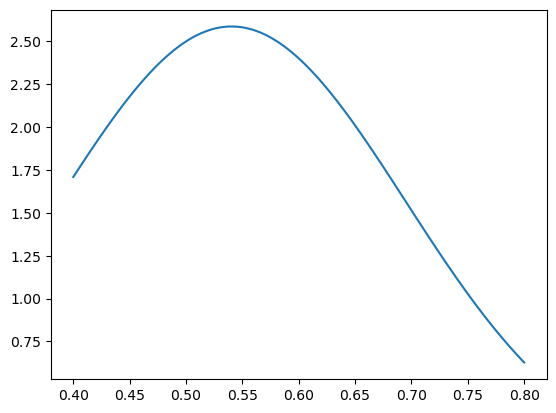

In [159]:
from scipy.stats import norm
import statistics

  
plt.plot(CV_V, norm.pdf(CV_V, mean, np.sqrt(var)))
plt.show()

In [932]:
prior = scipy.stats.norm.pdf(CV_V,0.6,1)

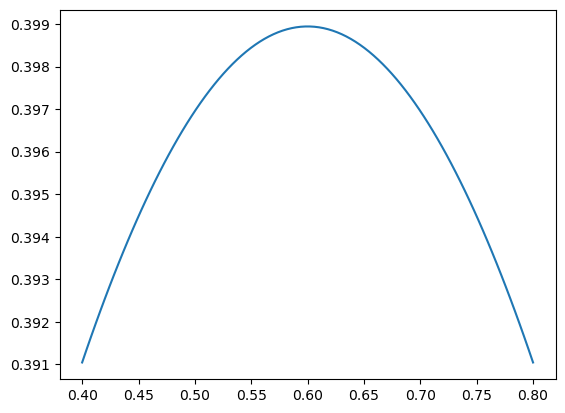

In [933]:
plt.plot(CV_V,prior)

In [934]:
posterior = likelihood*prior / (np.sum(likelihood*prior)*0.004)

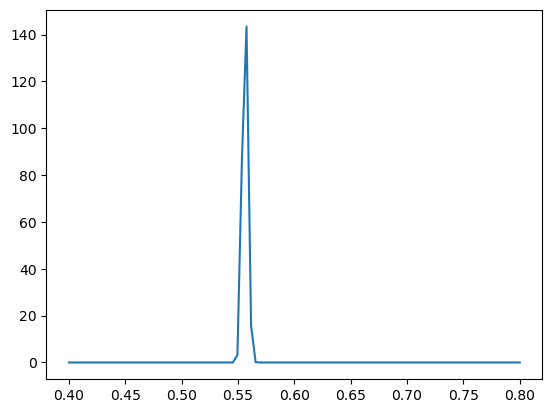

In [935]:
plt.plot(CV_V,posterior)

In [936]:
np.sum(posterior)*0.004

1.0

# True value is 0.556


In [959]:
emulator = GPE.ensemble(X_train.iloc[:,0:3],y_train,mean_func="linear",training_iter=500)

0
1


In [960]:
k_v = np.linspace(0.2,0.5,100)

In [961]:
k_v2, CV_V2 = np.meshgrid(k_v,CV_V)

In [962]:
k_v2.reshape(10000)

array([0.2       , 0.2030303 , 0.20606061, ..., 0.49393939, 0.4969697 ,
       0.5       ])

In [963]:
CV_V2.reshape(10000)

array([0.4, 0.4, 0.4, ..., 0.8, 0.8, 0.8])

In [964]:
newdf = pd.DataFrame(np.repeat(X_test.values, 10000, axis=0))#+np.random.multivariate_normal(mean=np.zeros(6), cov=0.01*np.identity(6), size=100)
newdf.columns = X_test.columns
print(newdf)

      (CV_ventricles,)  (k_ventricles,)  (k_FEC,)  (CV_atria,)  (k_atria,)  \
0             0.556019         0.336764   2.42194     0.552269    0.215546   
1             0.556019         0.336764   2.42194     0.552269    0.215546   
2             0.556019         0.336764   2.42194     0.552269    0.215546   
3             0.556019         0.336764   2.42194     0.552269    0.215546   
4             0.556019         0.336764   2.42194     0.552269    0.215546   
...                ...              ...       ...          ...         ...   
9995          0.556019         0.336764   2.42194     0.552269    0.215546   
9996          0.556019         0.336764   2.42194     0.552269    0.215546   
9997          0.556019         0.336764   2.42194     0.552269    0.215546   
9998          0.556019         0.336764   2.42194     0.552269    0.215546   
9999          0.556019         0.336764   2.42194     0.552269    0.215546   

      (k_BB,)  
0     2.00919  
1     2.00919  
2     2.00919  

In [965]:
newdf.iloc[:,0] = CV_V2.reshape(10000)
newdf.iloc[:,1] = k_v2.reshape(10000)

In [966]:
pred = emulator.predict(newdf.iloc[:,0:3])

In [967]:
pred

tensor([[188.2672, 263.6223],
        [188.1066, 262.1801],
        [187.9464, 260.6815],
        ...,
        [204.5457, 103.1894],
        [204.4133, 103.0325],
        [204.2810, 102.9411]], grad_fn=<PermuteBackward0>)

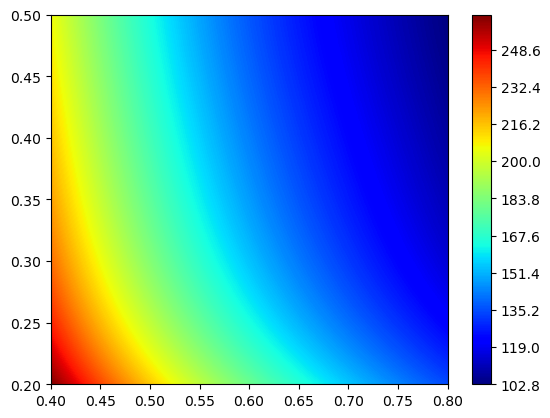

In [968]:
plt.contourf(CV_V2,k_v2, pred[:,1].detach().numpy().reshape(100,100),levels=1000, cmap = 'jet')
 
plt.colorbar()
plt.show()

In [969]:
X_test

,"(CV_ventricles,)","(k_ventricles,)","(k_FEC,)","(CV_atria,)","(k_atria,)","(k_BB,)"
26,0.556019,0.336764,2.42194,0.552269,0.215546,2.00919


In [970]:
y_test

,"(A_TAT,)","(V_TAT,)"
26,232.374,161.202


In [971]:
y_rep = pd.DataFrame(np.repeat(y_test.values, 10000, axis=0))
y_rep.columns = y_test.columns
print(y_rep)

      (A_TAT,)  (V_TAT,)
0      232.374   161.202
1      232.374   161.202
2      232.374   161.202
3      232.374   161.202
4      232.374   161.202
...        ...       ...
9995   232.374   161.202
9996   232.374   161.202
9997   232.374   161.202
9998   232.374   161.202
9999   232.374   161.202

[10000 rows x 2 columns]


In [972]:
likelihood = np.zeros(10000)
for i in range(10000):
    likelihood[i]=np.exp(mll(emulator.models[1]((torch.tensor(((newdf.iloc[i:i+1,0:3]-emulator.training_input_mean)/emulator.training_input_STD).values).float())),torch.tensor(((y_rep.iloc[i,1]-emulator.training_output_mean[1])/emulator.training_output_STD[1])).float()).detach().numpy())

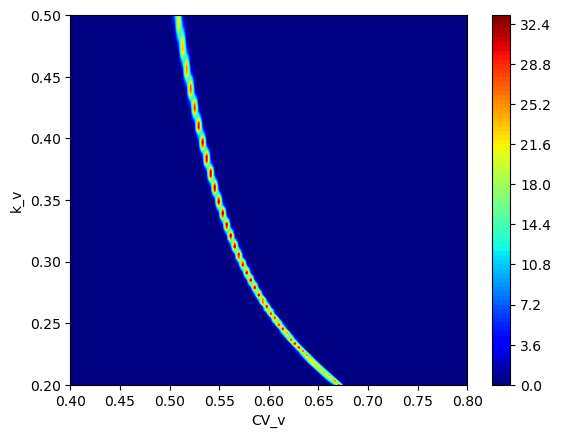

In [973]:
plt.contourf(CV_V2,k_v2, likelihood.reshape(100,100),levels=100, cmap = 'jet')
plt.colorbar()
plt.ylabel('k_v')
plt.xlabel('CV_v')
plt.show()


In [974]:
k_prior = scipy.stats.norm.pdf(k_v2,0.3,1)

In [975]:
posterior = likelihood.reshape(100,100)*k_prior / (np.sum(likelihood.reshape(100,100)*k_prior)*(0.004*0.003))

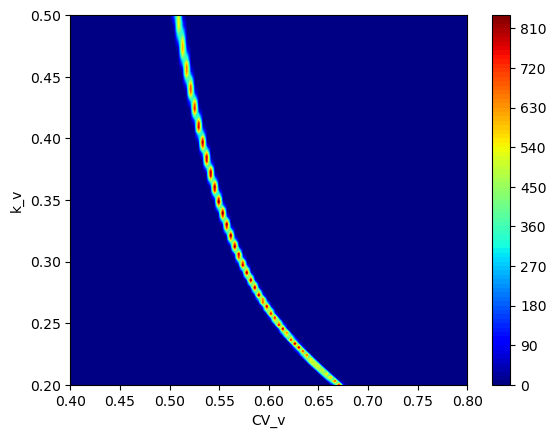

In [976]:
plt.contourf(CV_V2,k_v2, posterior,levels=100, cmap = 'jet')
plt.colorbar()
plt.ylabel('k_v')
plt.xlabel('CV_v')
plt.show()


In [956]:
c_prior = scipy.stats.norm.pdf(CV_V2,0.6,0.1)

In [957]:
posterior = likelihood.reshape(100,100)*c_prior / (np.sum(likelihood.reshape(100,100)*c_prior)*(0.004*0.003))

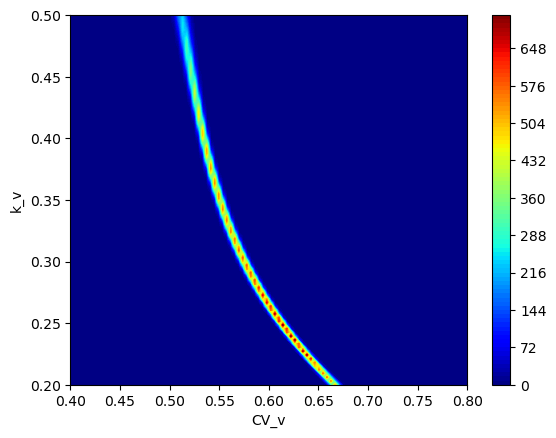

In [958]:
plt.contourf(CV_V2,k_v2, posterior,levels=100, cmap = 'jet')
plt.ylabel('k_v')
plt.xlabel('CV_v')
plt.colorbar()
plt.show()

# 3 params

In [706]:
inputOrig.max()

(CV_ventricles,)    0.798883
(k_ventricles,)     0.499215
(k_FEC,)            8.396810
(CV_atria,)         1.029280
(k_atria,)          0.499887
(k_BB,)             5.675750
dtype: float64

In [707]:
outputOrig.max()

(A_TAT,)    411.974
(V_TAT,)    251.164
dtype: float64

In [708]:
emulator = GPE.ensemble(X_train.iloc[:,0:3],y_train,mean_func="linear",training_iter=500)

0
1


In [709]:
100**2

10000

In [710]:
50**3

125000

In [711]:
CV_V = np.linspace(0.4,0.8,50)
k_v = np.linspace(0.2,0.5,50)
k_fec = np.linspace(1.2,8.4,50)


In [722]:
CV_V3,k_v3,k_fec3 = np.meshgrid(CV_V,k_v,k_fec)
X,Y,Z =  np.meshgrid(CV_V,k_v,k_fec)

In [723]:
newdf = pd.DataFrame(np.repeat(X_test.values, 125000, axis=0))#+np.random.multivariate_normal(mean=np.zeros(6), cov=0.01*np.identity(6), size=100)
newdf.columns = X_test.columns
print(newdf)

        (CV_ventricles,)  (k_ventricles,)  (k_FEC,)  (CV_atria,)  (k_atria,)  \
0               0.556019         0.336764   2.42194     0.552269    0.215546   
1               0.556019         0.336764   2.42194     0.552269    0.215546   
2               0.556019         0.336764   2.42194     0.552269    0.215546   
3               0.556019         0.336764   2.42194     0.552269    0.215546   
4               0.556019         0.336764   2.42194     0.552269    0.215546   
...                  ...              ...       ...          ...         ...   
124995          0.556019         0.336764   2.42194     0.552269    0.215546   
124996          0.556019         0.336764   2.42194     0.552269    0.215546   
124997          0.556019         0.336764   2.42194     0.552269    0.215546   
124998          0.556019         0.336764   2.42194     0.552269    0.215546   
124999          0.556019         0.336764   2.42194     0.552269    0.215546   

        (k_BB,)  
0       2.00919  
1  

In [724]:
newdf.iloc[:,0] = X.reshape(125000)
newdf.iloc[:,1] = Y.reshape(125000)
newdf.iloc[:,2] = Z.reshape(125000)

In [725]:
newdf.iloc[:,0:3]

,"(CV_ventricles,)","(k_ventricles,)","(k_FEC,)"
0,0.4,0.2,1.200000
1,0.4,0.2,1.346939
2,0.4,0.2,1.493878
3,0.4,0.2,1.640816
4,0.4,0.2,1.787755
...,...,...,...
124995,0.8,0.5,7.812245
124996,0.8,0.5,7.959184
124997,0.8,0.5,8.106122
124998,0.8,0.5,8.253061


In [726]:
emulator.predict(newdf.iloc[:,0:3]).max(axis=0)

torch.return_types.max(
values=tensor([221.9327, 351.9814], grad_fn=<MaxBackward0>),
indices=tensor([2450,    0]))

In [727]:
data = emulator.predict(newdf.iloc[:,0:3]).detach().numpy()[:,1].reshape(50,50,50)

In [728]:
X2, Y2= np.meshgrid(CV_V,k_v)

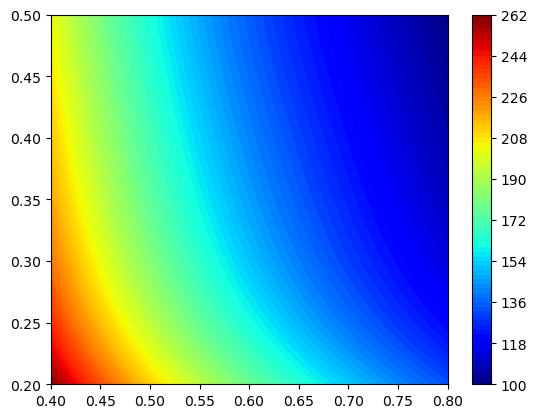

In [730]:
plt.contourf(X2,Y2, data[:,:,9],levels=100, cmap = 'jet')
plt.colorbar()
plt.show()

In [731]:
inputOrig.values[inputOrig.values[:,2]<1.3]

array([[0.546105, 0.302767, 1.2811  , 0.849472, 0.314406, 3.58887 ],
       [0.739425, 0.429136, 1.21197 , 0.370859, 0.24245 , 5.53377 ],
       [0.696926, 0.240736, 1.27473 , 0.867213, 0.465109, 3.83914 ]])

In [732]:
inputOrig.values[:,2]<1.3

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [733]:
y_rep = pd.DataFrame(np.repeat(y_test.values, 125000, axis=0))
y_rep.columns = y_test.columns
print(y_rep)

        (A_TAT,)  (V_TAT,)
0        232.374   161.202
1        232.374   161.202
2        232.374   161.202
3        232.374   161.202
4        232.374   161.202
...          ...       ...
124995   232.374   161.202
124996   232.374   161.202
124997   232.374   161.202
124998   232.374   161.202
124999   232.374   161.202

[125000 rows x 2 columns]


In [734]:
likelihood = np.zeros(125000)
for i in range(125000):
    likelihood[i]=np.exp(mll(emulator.models[1]((torch.tensor(((newdf.iloc[i:i+1,0:3]-emulator.training_input_mean)/emulator.training_input_STD).values).float())),torch.tensor(((y_rep.iloc[i,1]-emulator.training_output_mean[1])/emulator.training_output_STD[1])).float()).detach().numpy())

In [735]:
kfec_prior =scipy.stats.norm.pdf(k_fec3,4,2)
kv_prior = scipy.stats.norm.pdf(k_v3,0.4,2)
CV_prior = scipy.stats.norm.pdf(CV_V3,0.6,2)

In [736]:
CV_posterior = likelihood.reshape(50,50,50)*CV_prior / (np.sum(likelihood.reshape(50,50,50)*CV_prior)*(0.008*0.006*0.144))
kv_posterior = likelihood.reshape(50,50,50)*kv_prior / (np.sum(likelihood.reshape(50,50,50)*kv_prior)*(0.008*0.006*0.144))
kfec_posterior = likelihood.reshape(50,50,50)*kfec_prior / (np.sum(likelihood.reshape(50,50,50)*kfec_prior)*(0.008*0.006*0.144))

In [749]:
CV, kv = np.meshgrid(CV_V,k_v)

In [764]:
k_fec[8]

2.3755102040816327

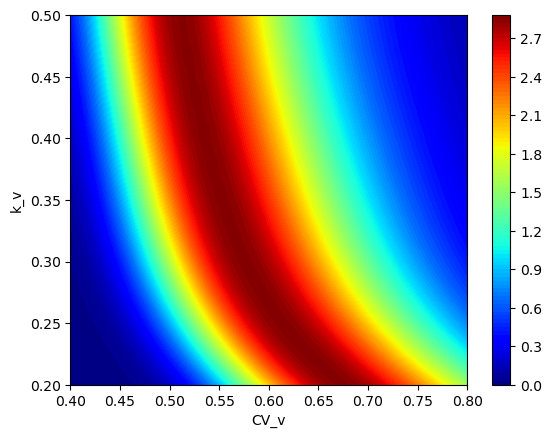

In [763]:
plt.contourf(CV,kv, CV_posterior[:,:,8],levels=100, cmap = 'jet')
plt.ylabel('k_v')
plt.xlabel('CV_v')
plt.colorbar()
plt.show()

In [765]:
k_fec

array([1.2       , 1.34693878, 1.49387755, 1.64081633, 1.7877551 ,
       1.93469388, 2.08163265, 2.22857143, 2.3755102 , 2.52244898,
       2.66938776, 2.81632653, 2.96326531, 3.11020408, 3.25714286,
       3.40408163, 3.55102041, 3.69795918, 3.84489796, 3.99183673,
       4.13877551, 4.28571429, 4.43265306, 4.57959184, 4.72653061,
       4.87346939, 5.02040816, 5.16734694, 5.31428571, 5.46122449,
       5.60816327, 5.75510204, 5.90204082, 6.04897959, 6.19591837,
       6.34285714, 6.48979592, 6.63673469, 6.78367347, 6.93061224,
       7.07755102, 7.2244898 , 7.37142857, 7.51836735, 7.66530612,
       7.8122449 , 7.95918367, 8.10612245, 8.25306122, 8.4       ])

In [766]:
X_test

,"(CV_ventricles,)","(k_ventricles,)","(k_FEC,)","(CV_atria,)","(k_atria,)","(k_BB,)"
26,0.556019,0.336764,2.42194,0.552269,0.215546,2.00919


In [767]:
np.argmax(CV_posterior)

48706

In [768]:
CV_posterior.shape

(50, 50, 50)

In [772]:
CV_V3.reshape(125000)[np.argmax(likelihood)]

0.47346938775510206

In [773]:
k_fec3.reshape(125000)[np.argmax(likelihood)]

4.1387755102040815

In [774]:
k_v3.reshape(125000)[np.argmax(likelihood)]

0.35918367346938773

# Multiple Patients

In [30]:
mode_weights = pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\modes_weights.csv',index_col=0,delim_whitespace=False,header=0)

In [31]:
mode_weights=mode_weights.drop(15,axis=0)

In [32]:
meshes=['01','02','03','04','05','06','07','08','09','10','11','12','13','14','16','17','18','19']

In [33]:
x_labels=pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\EP_healthy\input\xlabels_EP.txt',delim_whitespace=True,header=None)
x_labels=x_labels.values.flatten().tolist()+mode_weights.columns.tolist()

In [34]:
y_labels=pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\EP_healthy\output\ylabels.txt',delim_whitespace=True,header=None)

In [35]:
val=meshes[len(meshes)-1]
inputData = pd.read_csv("/Users/pmzcwl/Documents/GitHub/Calibration/shared_simulations/EP_healthy/"+val+"/X_EP.txt",index_col=None,delim_whitespace=True,header=None).values
outputData_left_out = pd.read_csv("/Users/pmzcwl/Documents/GitHub/Calibration/shared_simulations/EP_healthy/"+val+"/Y.txt",index_col=None,delim_whitespace=True,header=None).values
modeweights = np.tile(mode_weights.iloc[len(meshes)-1,:].values, (inputData.shape[0],1))
input_modes_left_out = np.concatenate((inputData,modeweights),axis=1)

outputData_left_out =pd.DataFrame(outputData_left_out)
input_modes_left_out = pd.DataFrame(input_modes_left_out)
input_modes_left_out.columns=x_labels
outputData_left_out.columns=y_labels

In [36]:
all_input = []
all_output=[]
for i in range(len(meshes)-1):
    val=meshes[i]
    
    inputData = pd.read_csv("/Users/pmzcwl/Documents/GitHub/Calibration/shared_simulations/EP_healthy/"+val+"/X_EP.txt",index_col=None,delim_whitespace=True,header=None).values
    outputData = pd.read_csv("/Users/pmzcwl/Documents/GitHub/Calibration/shared_simulations/EP_healthy/"+val+"/Y.txt",index_col=None,delim_whitespace=True,header=None).values
    modeweights = np.tile(mode_weights.iloc[i,:].values, (inputData.shape[0],1))
    input_modes = np.concatenate((inputData,modeweights),axis=1)
    all_input.append(pd.DataFrame(input_modes))
    all_output.append(pd.DataFrame(outputData))
    print(val)
    print(np.max(outputData))
all_input=pd.concat(all_input)
all_output=pd.concat(all_output)
all_input.columns=x_labels
all_output.columns=y_labels

01
406.703
02
317.407
03
332.914
04
309.14
05
277.849
06
296.377
07
355.546
08
283.103
09
391.145
10
439.316
11
348.01
12
292.465
13
301.222
14
325.678
16
297.968
17
317.709
18
297.346


In [37]:
all_input=all_input.drop(labels=["CV_atria","k_atria", "k_BB"],axis=1)

In [38]:
all_input

,CV_ventricles,k_ventricles,k_FEC,Mode1,Mode2,Mode3,Mode4,Mode5,Mode6,Mode7,...,Mode9,Mode10,Mode11,Mode12,Mode13,Mode14,Mode15,Mode16,Mode17,Mode18
0,0.487005,0.321104,6.56834,-26.526282,-21.987510,45.298672,6.964297,1.264487,-14.710058,2.926209,...,23.694737,3.505879,0.634389,5.188583,0.952835,-1.595273,1.443640,-0.904097,-1.312873,-0.395244
1,0.649337,0.345380,4.40605,-26.526282,-21.987510,45.298672,6.964297,1.264487,-14.710058,2.926209,...,23.694737,3.505879,0.634389,5.188583,0.952835,-1.595273,1.443640,-0.904097,-1.312873,-0.395244
2,0.666146,0.431970,7.48917,-26.526282,-21.987510,45.298672,6.964297,1.264487,-14.710058,2.926209,...,23.694737,3.505879,0.634389,5.188583,0.952835,-1.595273,1.443640,-0.904097,-1.312873,-0.395244
3,0.564330,0.319989,4.09474,-26.526282,-21.987510,45.298672,6.964297,1.264487,-14.710058,2.926209,...,23.694737,3.505879,0.634389,5.188583,0.952835,-1.595273,1.443640,-0.904097,-1.312873,-0.395244
4,0.519419,0.363704,6.37449,-26.526282,-21.987510,45.298672,6.964297,1.264487,-14.710058,2.926209,...,23.694737,3.505879,0.634389,5.188583,0.952835,-1.595273,1.443640,-0.904097,-1.312873,-0.395244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.450695,0.376123,4.74960,-23.204781,-27.182479,-35.870687,7.551222,3.960247,6.445815,12.219776,...,6.663375,9.520599,-1.242942,-5.988096,-3.404571,3.616827,-4.258405,-4.047239,2.077171,10.044157
176,0.532560,0.218931,3.25166,-23.204781,-27.182479,-35.870687,7.551222,3.960247,6.445815,12.219776,...,6.663375,9.520599,-1.242942,-5.988096,-3.404571,3.616827,-4.258405,-4.047239,2.077171,10.044157
177,0.529807,0.316814,3.79157,-23.204781,-27.182479,-35.870687,7.551222,3.960247,6.445815,12.219776,...,6.663375,9.520599,-1.242942,-5.988096,-3.404571,3.616827,-4.258405,-4.047239,2.077171,10.044157
178,0.536693,0.346377,4.10958,-23.204781,-27.182479,-35.870687,7.551222,3.960247,6.445815,12.219776,...,6.663375,9.520599,-1.242942,-5.988096,-3.404571,3.616827,-4.258405,-4.047239,2.077171,10.044157


In [39]:
# split original dataset in training, validation and testing sets
X=all_input.iloc[:,0:12]
y=all_output

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=seed
)

In [40]:
emulator = GPE.ensemble(X_train,y_train,mean_func="linear",training_iter=500)

0


KeyboardInterrupt: 

In [ ]:
X_test_split = X_test.iloc[10].to_frame().T
y_test_split = y_test.iloc[10].to_frame().T

In [ ]:
X_test_left_out = input_modes_left_out.iloc[10,0:15].drop(labels=["CV_atria","k_atria", "k_BB"]).to_frame().T
y_test_left_out = outputData_left_out.iloc[10].to_frame().T

In [ ]:
X_test_split

In [ ]:
y_test_split

In [ ]:
X_test_left_out

In [ ]:
y_test_left_out

In [ ]:
Nx = 20

In [ ]:
CV_V = np.linspace(0.4,0.8,Nx)
k_v = np.linspace(0.2,0.5,Nx)
k_fec = np.linspace(1.2,8.4,Nx)

In [ ]:
CV_V3,k_v3,k_fec3 = np.meshgrid(CV_V,k_v,k_fec)

In [ ]:
newdf = pd.DataFrame(np.repeat(X_test_left_out.values, Nx**3, axis=0))#+np.random.multivariate_normal(mean=np.zeros(6), cov=0.01*np.identity(6), size=100)
newdf.columns = X_test_left_out.columns
#print(newdf)

In [ ]:
newdf.iloc[:,0] = CV_V3.reshape(Nx**3)
newdf.iloc[:,1] = k_v3.reshape(Nx**3)
newdf.iloc[:,2] = k_fec3.reshape(Nx**3)

In [ ]:
data = emulator.predict(newdf).detach().numpy()[:,1].reshape(Nx,Nx,Nx)

In [ ]:
y_rep = pd.DataFrame(np.repeat(y_test_left_out.values, Nx**3, axis=0))
y_rep.columns = y_test.columns
print(y_rep)

In [ ]:
t1_start = process_time() 
likelihood = np.zeros(Nx**3)
for i in range(Nx**3):
    likelihood[i]=np.exp(mll(emulator.models[1]((torch.tensor(((newdf.iloc[i:i+1]-emulator.training_input_mean)/emulator.training_input_STD).values).float())),torch.tensor(((y_rep.iloc[i,1]-emulator.training_output_mean[1])/emulator.training_output_STD[1])).float()).detach().numpy())
    print(i)
    
t1_stop = process_time() 
   
print("Elapsed time:", t1_stop, t1_start)  
   
print("Elapsed time during the whole program in seconds:", 
                                         t1_stop-t1_start)     

In [ ]:
kfec_prior =scipy.stats.norm.pdf(k_fec3,4,2)
kv_prior = scipy.stats.norm.pdf(k_v3,0.4,2)
CV_prior = scipy.stats.norm.pdf(CV_V3,0.6,2)

In [ ]:
dCV = (np.max(CV_V)-np.min(CV_V))/Nx
dkv = (np.max(k_v)-np.min(k_v))/Nx
dkfec = (np.max(k_fec)-np.min(k_fec))/Nx

In [ ]:
CV_posterior = likelihood.reshape(Nx,Nx,Nx)*CV_prior / (np.sum(likelihood.reshape(Nx,Nx,Nx)*CV_prior)*(dCV*dkv*dkfec))
kv_posterior = likelihood.reshape(Nx,Nx,Nx)*kv_prior / (np.sum(likelihood.reshape(Nx,Nx,Nx)*kv_prior)*(dCV*dkv*dkfec))
kfec_posterior = likelihood.reshape(Nx,Nx,Nx)*kfec_prior / (np.sum(likelihood.reshape(Nx,Nx,Nx)*kfec_prior)*(dCV*dkv*dkfec))

In [ ]:
CV, kv = np.meshgrid(CV_V,k_v)

In [ ]:
k_fec[9]

In [ ]:
plt.contourf(CV,kv, CV_posterior[:,:,9],levels=100, cmap = 'jet')
plt.colorbar()
plt.show()

In [ ]:
kv.shape

In [ ]:
CV_V3.reshape(Nx**3)[np.argmax(likelihood)]

In [ ]:
k_fec3.reshape(Nx**3)[np.argmax(likelihood)]

In [ ]:
k_v3.reshape(Nx**3)[np.argmax(likelihood)]

In [ ]:
CV_V3.reshape(Nx**3)[np.argmax(CV_posterior)]

k_fec3.reshape(Nx**3)[np.argmax(CV_posterior)]

k_v3.reshape(Nx**3)[np.argmax(CV_posterior)]

In [ ]:
x2 = X_test_left_out.copy()
x2.iloc[0,0:3] = p0[0]

In [ ]:
X_test_left_out.copy()

In [ ]:
x2

In [ ]:
def log_prob(x,emulator,y_val):
    x2 = X_test_left_out.copy()
    x2.iloc[0,0:3] = p0[0]
    return mll(emulator.models[1]((torch.tensor(((x2-emulator.training_input_mean)/emulator.training_input_STD).values).float())),torch.tensor(((y_val-emulator.training_output_mean[1])/emulator.training_output_STD[1])).float()).detach().numpy()

In [ ]:
p0[0]

In [ ]:
emulator.training_input_mean

In [ ]:
emulator.models[1].eval()
log_prob(p0[0],emulator,y_val)

In [ ]:
import emcee
ndim = 3
nwalkers = 10
p0 = np.random.randn(nwalkers, ndim)
y_val = y_test_left_out.iloc[0,1]

In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[emulator,y_val])

In [ ]:
sampler

In [ ]:
state = sampler.run_mcmc(p0, 10)
sampler.reset()

In [ ]:
t1_start = process_time() 
sampler.run_mcmc(state, 10000);
t1_stop = process_time() 
   
print("Elapsed time:", t1_stop, t1_start)  
   
print("Elapsed time during the whole program in seconds:", 
                                         t1_stop-t1_start)   

In [ ]:
import matplotlib.pyplot as plt

samples = sampler.get_chain(flat=True)
plt.hist(samples[:, 0], 100, color="k", histtype="step")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$p(\theta_1)$")
plt.gca().set_yticks([]);